# Toxic basic EDA

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [9]:
from pathlib import Path
import json
from matplotlib import patches, patheffects
from fastai.dataset import *
import seaborn as sns

In [3]:
PATH = Path('data/toxic')
list(PATH.iterdir())

[PosixPath('data/toxic/train.csv'), PosixPath('data/toxic/test.csv')]

In [4]:
train_df = pd.read_csv(PATH/'train.csv')
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
labels=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [15]:
print(train_df.shape)

(159571, 8)


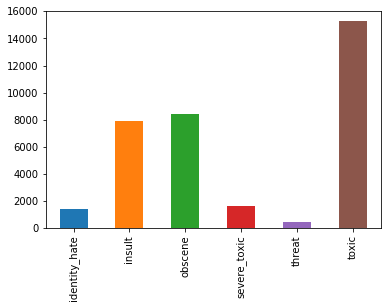

In [16]:
temp={}
for i in labels:
    temp[i]= train_df[i].value_counts()[1]
pd.Series(temp).plot(kind='bar')

### Multiclass labels

In [21]:
pd.crosstab(train_df.toxic, train_df.severe_toxic)

severe_toxic,0,1
toxic,,
0,144277,0
1,13699,1595


In [ ]:
train_df['total'] = train_df[labels].sum(axis=1)

In [30]:
train_df.total.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: total, dtype: int64

In [31]:
train_df[train_df.total==6].comment_text

1017      WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...
1312      SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!
7299      You're a stupid cunt \n\nFuck you dumb arse, y...
13648     Bitch \n\nYou are a little bitch. I fuckin spe...
13964     I am going to murder ZimZalaBim ST47 for being...
22158     FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...
29968     u motherfukkin bitch i want to rape you smelly...
32098     Fuck All Asyriac Nation \n\nQamishli belong to...
33951     GO FUCK YOURSELF BITCH.  I HATE YOUR SOULD.  M...
38513     AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...
38578     fuck you honkey, why you hatin' on blacks? You...
46155           So fuck off and die, rape fantasising sluts
55160     ANYONE WHO SUPPORTS THIS IS FUCKING SICK. MEN ...
59279     JEW \n\nGet the fuck out of here you jewish so...
65075     FAGGOTS!  YO FUCKER IT WAS FUCKING HAYES YOU F...
67247     YOURE A FRREAKING JEW, AND PLEAZE COMMIT SUICIDE.
73821     Shut up you asswipe, we don't 